In [39]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Gráficos
# ------------------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Transformación de los datos
# ------------------------------------------------------------------------------
from scipy import stats
import math 
from sklearn.preprocessing import MinMaxScaler

# Para la gestión de los warning
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Para poder ver todas las columnas del dataframe
# ------------------------------------------------------------------------------
pd.options.display.max_columns = None 

# Pair Programming Normalización

- En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.
- En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta. 

### Los objetivos del pair programming de hoy son:

Sobre la variable **respuesta**, en pair programmings anterior identificastéis si seguía una distribución normal o no. 
En caso de que **no** siguiera una distribución normal, **normalizarla**. 

Podéis usar el método que prefiráis o el que mejor se ajuste
Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings

In [42]:
df = pd.read_csv("data/05-primas_limpio.csv", index_col = 0)
df.head(2)

,age,sex,bmi,children,smoker,region,charges
3,33,male,22.705,0,no,northwest,21984.47061
9,60,female,25.840,0,no,northwest,28923.13692


# Vemos nuestros datos

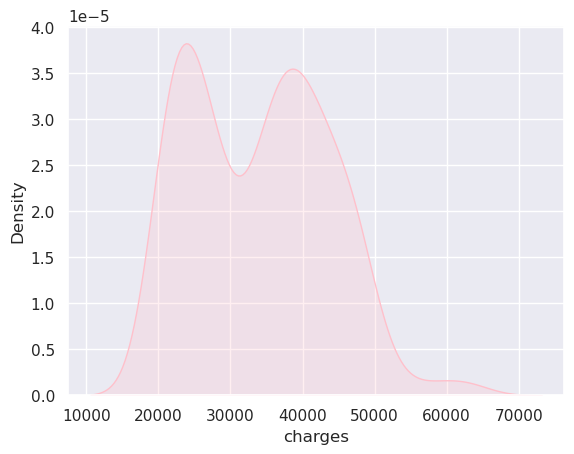

In [43]:
sns.set(style="ticks")
sns.set_style("darkgrid")
sns.distplot(
    df["charges"], 
    hist = False, 
    color = "pink", 
    kde_kws = {"shade": True, "linewidth": 1});

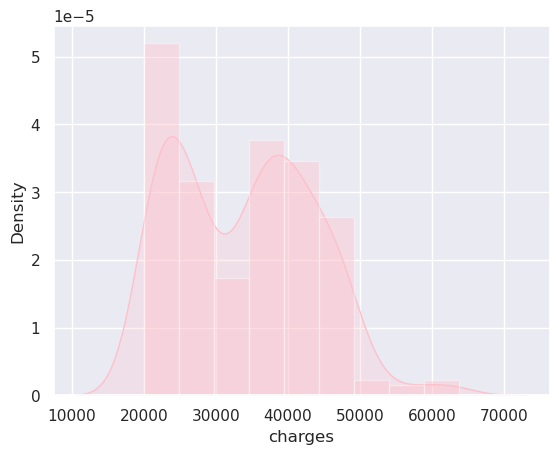

In [44]:
sns.set(style="ticks")
sns.set_style("darkgrid")
sns.distplot(
    df["charges"], 
    #hist = False, 
    color = "pink", 
    kde_kws = {"shade": True, "linewidth": 1});

vemos sin dudas que nuestros datos no son normales, aunque para terminar de verlo hacemos el test shapiro paa corroborar lo que estamos viendo

In [45]:
stats.shapiro(df["charges"])

ShapiroResult(statistic=0.9475391507148743, pvalue=2.5857394447825754e-08)

Vemos que **p-valor < 0.05** , rechazamos la hipotesis nulas, y por tanto, nuestros datos no son normales.

# Vamos a normalizarla probamos primero con el método manual

In [46]:
# vamos a crear distintas variables con los estadísticos que necesitamos

media = df["charges"].mean()
maximo = df["charges"].max() 
minimo = df["charges"].min()

In [47]:
# vamos a crearnos una columna nueva con el resultado de la normalización

df["charges_norma"] = (df["charges"] - media) / (maximo - minimo )

In [48]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges,charges_norma
3,33,male,22.705,0,no,northwest,21984.47061,-0.274233
9,60,female,25.840,0,no,northwest,28923.13692,-0.115674


Hacemos la visualización para ver si se han normalizado

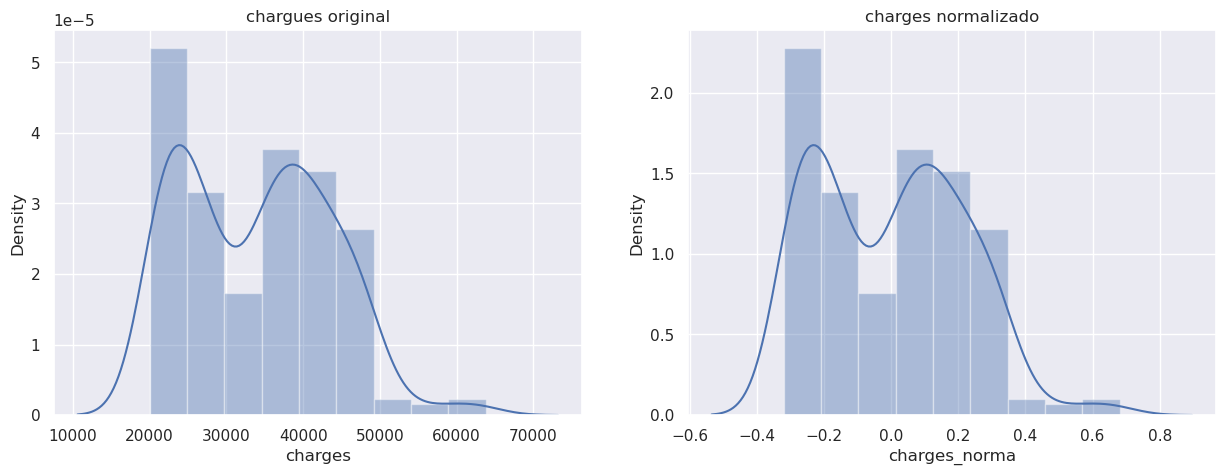

In [49]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('chargues original')
axes[1].set_title('charges normalizado')

sns.distplot(df['charges'] ,ax = axes[0])
sns.distplot(df["charges_norma"], ax = axes[1]);

In [50]:
stats.shapiro(df["charges"])

ShapiroResult(statistic=0.9475391507148743, pvalue=2.5857394447825754e-08)

No ha dado resultado pasamos a realizar otros métodos

# Logaritmica

logaritmica, que no se puede aplicar si tenemos algun valor que sea 0 por lo tanto hacemos esta list comprehension para evitar este posible error

In [51]:
df["charges_log"] = df["charges"].apply(lambda x: np.log(x) if x > 0 else 0)

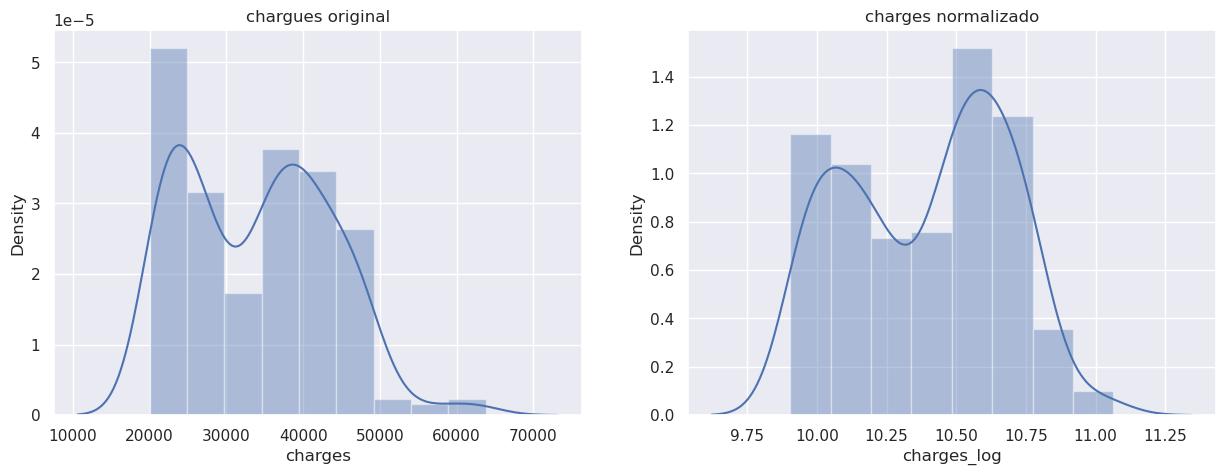

In [52]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('chargues original')
axes[1].set_title('charges normalizado')

sns.distplot(df['charges'] ,ax = axes[0])
sns.distplot(df["charges_log"], ax = axes[1]);

In [53]:
stats.shapiro(df["charges_log"])

ShapiroResult(statistic=0.9462772607803345, pvalue=1.8898210996098896e-08)

De nuevo p-valor es menor que 0.05 seguimos probamdo aproximaciones.

# Raiz cuadrada

In [54]:
df["charges_raiz"] = df["charges"].apply(lambda x: math.sqrt(x))

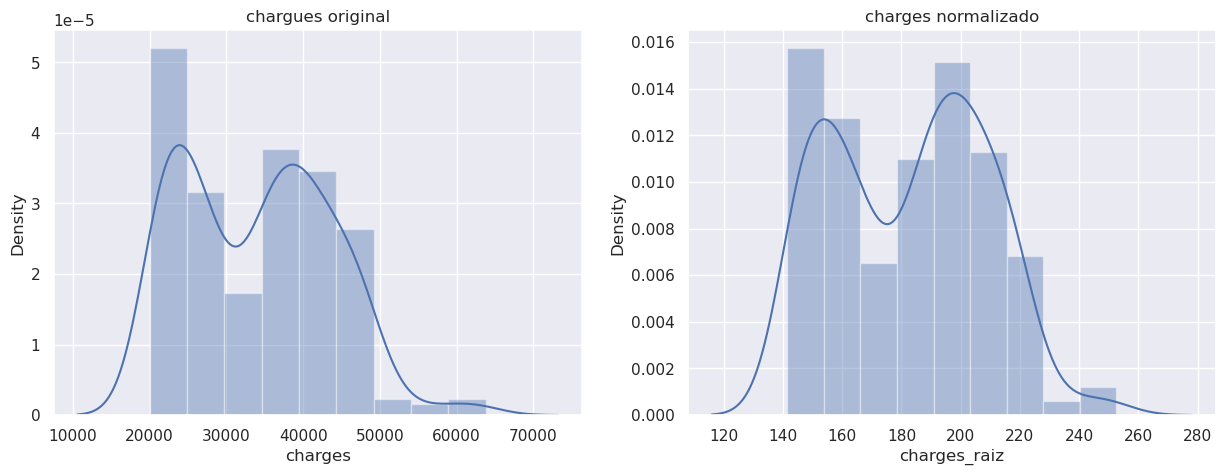

In [55]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('chargues original')
axes[1].set_title('charges normalizado')

sns.distplot(df['charges'] ,ax = axes[0])
sns.distplot(df["charges_raiz"], ax = axes[1]);

In [56]:
stats.shapiro(df["charges_raiz"])

ShapiroResult(statistic=0.9504589438438416, pvalue=5.4363120227662876e-08)

Seguimos igual

# Método stats.boxcox

In [57]:
df['charges_box'], lambda_ajustada = stats.boxcox(df['charges'])

In [58]:
# el valor de lambda en esta tranformación sería
lambda_ajustada

0.19914498009617945

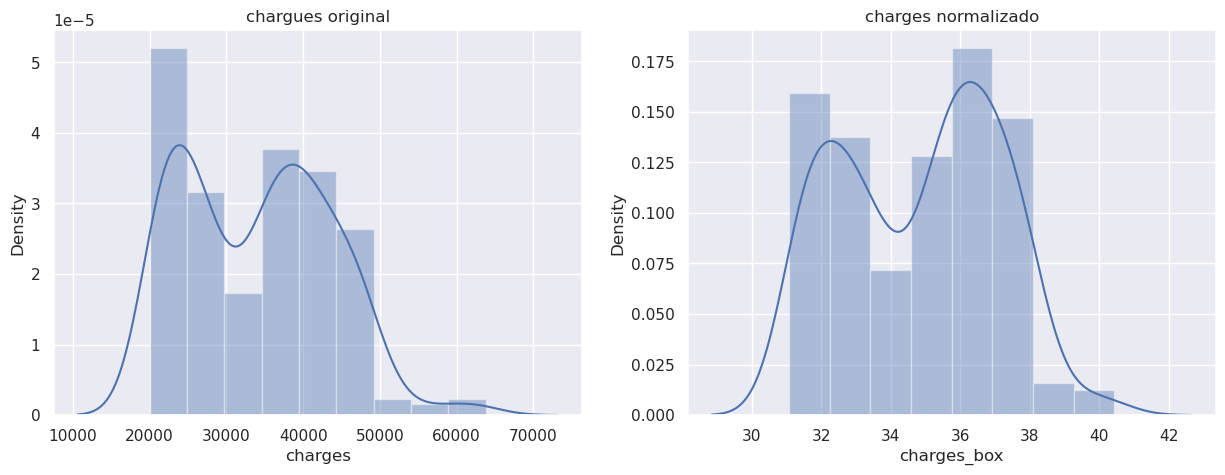

In [59]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('chargues original')
axes[1].set_title('charges normalizado')

sns.distplot(df['charges'] ,ax = axes[0])
sns.distplot(df["charges_box"], ax = axes[1]);

In [60]:
stats.shapiro(df["charges_box"])

ShapiroResult(statistic=0.9486996531486511, pvalue=3.463754438826072e-08)

Seguimos igual

# Sklearn MinMaxScaller

In [61]:
# extraemos las columnas numéricas
numericas = df.select_dtypes(include = np.number)

In [62]:
# construir el modelo de escalador
minmax = MinMaxScaler()

In [63]:
# ajustamos el modelo utilizando nuestro set de datos
minmax.fit(df[['charges']])

MinMaxScaler()

In [64]:
# transformamos los datos
X_normalizadas = minmax.transform(df[["charges"]])

In [65]:
# Vamos a verificar los valores mínimos después de la normalización
X_normalizadas.min(axis=0)

array([0.])

In [66]:
# y los máximos?
X_normalizadas.max(axis=0)

array([1.])

Ya estan en la misma escala entre 0 y 1 

In [67]:
# por último convertiremos el array que nos devuelve en un dataframe. 

numericas_minmax = pd.DataFrame(X_normalizadas, columns = ["charges_Sklearn"])
numericas_minmax.head(2)

,charges_Sklearn
0,0.045128
1,0.203687


In [68]:
# incorporamos la columna al dataframe 

df["charges_Sklearn"] = numericas_minmax
df.head(2)

,age,sex,bmi,children,smoker,region,charges,charges_norma,charges_log,charges_raiz,charges_box,charges_Sklearn
3,33,male,22.705,0,no,northwest,21984.47061,-0.274233,9.998092,148.271611,31.752564,0.447938
9,60,female,25.840,0,no,northwest,28923.13692,-0.115674,10.272397,170.068036,33.817284,0.451652


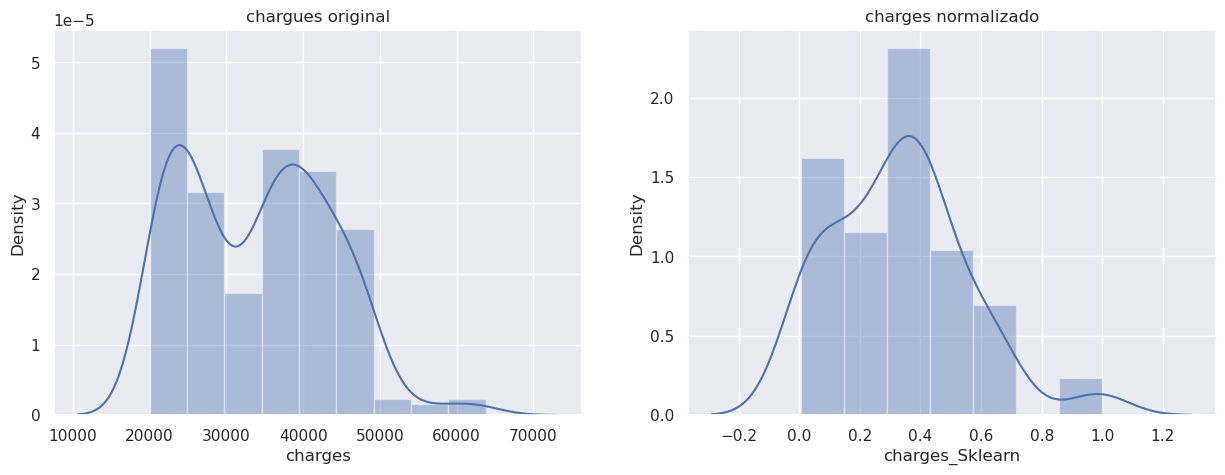

In [69]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('chargues original')
axes[1].set_title('charges normalizado')

sns.distplot(df['charges'] ,ax = axes[0])
sns.distplot(df["charges_Sklearn"], ax = axes[1]);

In [70]:
stats.shapiro(df["charges_Sklearn"])

ShapiroResult(statistic=nan, pvalue=1.0)

In [71]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges,charges_norma,charges_log,charges_raiz,charges_box,charges_Sklearn
3,33,male,22.705,0,no,northwest,21984.47061,-0.274233,9.998092,148.271611,31.752564,0.447938
9,60,female,25.840,0,no,northwest,28923.13692,-0.115674,10.272397,170.068036,33.817284,0.451652


# Genial

Ha funcionado, nuestro p-valor es mayor que 0.05 y por tanto nuestros datos se han normalizado.

Limpiamos las nuevas columnas de nuestro df y dejamos solo esta última.

In [72]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'charges_norma', 'charges_log', 'charges_raiz', 'charges_box',
       'charges_Sklearn'],
      dtype='object')

In [73]:
df.drop(['charges_norma', 'charges_log', 'charges_raiz', 'charges_box'], axis =1, inplace=True)

In [74]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges,charges_Sklearn
3,33,male,22.705,0,no,northwest,21984.47061,0.447938
9,60,female,25.840,0,no,northwest,28923.13692,0.451652


In [75]:
#guardamos el csv

df.to_csv("data/05-primas_normalizadas.csv")